In [2]:
# EDA Functions
def univariate_stats(df, roundto = 4):
    import pandas as pd
    import numpy as np

    # middle row below are more like metrics. bottom row contains measures (actually calculated)
    df_results = pd.DataFrame(columns=['dtype', 'count', 'missing', 'unique', 'mode',
                                       'min', 'q1', 'median', 'q3', 'max',
                                       'mean', 'std', 'skew', 'kurt'])
    for col in df:
        dtype = df[col].dtype
        count = df[col].count()
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode()[0]
        except:
            print(f"Mode cannot be calculated for {col}")
            mode = np.nan

        if pd.api.types.is_numeric_dtype(df[col]):
            min = df[col].min()
            q1 = df[col].quantile(0.25)
            median = df[col].median()
            q3 = df[col].quantile(0.75)
            max = df[col].max()
            mean = df[col].mean()
            std = df[col].std()
            skew = df[col].skew()
            kurt = df[col].kurt()

            df_results.loc[col] = [dtype, count, missing, unique, mode, round(min, roundto), round(q1, roundto), round(median, roundto), 
                                   round(q3, roundto), round(max, roundto), round(mean, roundto), round(std, roundto), round(skew, roundto),
                                     round(kurt, roundto)]
        else:
            df_results.loc[col] = [dtype, count, missing, unique, mode, "-", "-", "-", "-", "-", "-", "-", "-", "-"]

    return df_results

In [3]:
import pandas as pd

df_titles = pd.read_csv('/Users/portergraham/Downloads/movies_titles.csv')
df_users = pd.read_csv('/Users/portergraham/Downloads/movies_users.csv', index_col='user_id')
df_ratings = pd.read_csv('/Users/portergraham/Downloads/movies_ratings.csv')

In [4]:
df_titles.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,description,...,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,...,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,...,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,...,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df_users.head()

,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
user_id,,,,,,,,,,,,,,,,
1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


In [6]:
df_ratings.head()

,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


## Clean Titles dataset
* Put 'Multiple Directors' for TV shows with null directors
* Drop rows w/ null director & null cast
* There is a show called "The Afterparty" that has null directors for most of the rows, and is a netflix show sort of. Jon Mackey is the most common director for this show so I'll replace all those null values w/ his name
* Drop the rest of the rows w/ null director & no cast
* Don't think we'll do region-based filtering so we'll drop the whole country column

In [4]:
df_titles['director'] = df_titles.apply(lambda row: 'Multiple Directors' if pd.isnull(row['director']) and row['type'] == 'TV Show' else row['director'], axis=1)

In [5]:
df_titles = df_titles[~(df_titles['director'].isnull() & df_titles['cast'].isnull())]

In [6]:
df_titles.loc[df_titles['title'].str.contains('Afterparty', case=False, na=False) & df_titles['director'].isnull(), 'director'] = 'Jon Mackey'

In [7]:
df_titles.drop(columns=['country'], inplace=True)
df_titles = df_titles[df_titles['director'].notnull()]

In [8]:
df_titles = df_titles[df_titles['cast'].notnull()]

In [9]:
univariate_stats(df_titles)

,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
show_id,object,8339,0,8339,s1,-,-,-,-,-,-,-,-,-
type,object,8339,0,2,Movie,-,-,-,-,-,-,-,-,-
title,object,8339,0,8336,15-Aug,-,-,-,-,-,-,-,-,-
director,object,8339,0,4656,Multiple Directors,-,-,-,-,-,-,-,-,-
cast,object,8339,0,8082,David Attenborough,-,-,-,-,-,-,-,-,-
release_year,int64,8339,0,73,2018,1942,2013.0,2017.0,2019.0,2021,2014.156,8.8067,-3.3708,15.2783
rating,object,8336,3,14,TV-MA,-,-,-,-,-,-,-,-,-
duration,object,8338,1,216,1 Season,-,-,-,-,-,-,-,-,-
description,object,8339,0,8311,Paranormal activity at a lush abandoned proper...,-,-,-,-,-,-,-,-,-
Action,int64,8339,0,2,0,0,0.0,0.0,0.0,1,0.1217,0.327,2.3144,3.3571


In [10]:
df_titles.to_csv("movies_titles_cleaned.csv", index=False)

## Users & ratings look fine, shouldn't really need much cleaning
* Name, email, and phone aren't necessary and might be illegal to use, so I'll drop those columns

In [11]:
df_users = df_users.drop(columns=['name', 'email', 'phone'])

In [12]:
univariate_stats(df_users)

,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
age,int64,200,0,47,30,18,30.0,42.0,53.0,65,41.61,13.542,-0.0341,-1.1433
gender,object,200,0,3,Female,-,-,-,-,-,-,-,-,-
Netflix,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.475,0.5006,0.1009,-2.01
Amazon Prime,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.495,0.5012,0.0202,-2.0199
Disney+,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.48,0.5009,0.0807,-2.0137
Paramount+,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.45,0.4987,0.2025,-1.9789
Max,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.445,0.4982,0.223,-1.9701
Hulu,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.47,0.5004,0.1211,-2.0055
Apple TV+,int64,200,0,2,1,0,0.0,1.0,1.0,1,0.535,0.5,-0.1414,-2.0001
Peacock,int64,200,0,2,1,0,0.0,1.0,1.0,1,0.565,0.497,-0.2642,-1.9498


In [13]:
univariate_stats(df_ratings)

,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
user_id,int64,2147,0,200,1,1,51.0,101.0,151.0,200,100.6935,57.7593,-0.009,-1.1987
show_id,object,2147,0,1809,s2179,-,-,-,-,-,-,-,-,-
rating,int64,2147,0,3,4,3,3.0,4.0,5.0,5,3.9828,0.809,0.0314,-1.4712


## Bivariate Stats (Even though Prof. Keith said it's useless, the rubric says we need some visuals :)

In [14]:
def bivariate(df, label, roundto=4):
  import pandas as pd
  from scipy import stats
  
  output_df = pd.DataFrame(columns=['missing', 'p', 'r', 'τ', 'ρ', 'y = m(x) + b', 'F', 'X2', 'skew', 'unique', 'values'])
  
  for feature in df.columns:
    if feature != label:
      df_temp = df[[feature, label]]
      df_temp = df_temp.dropna()
      missing = (df.shape[0] - df_temp.shape[0]) / df.shape[0]
      unique = df_temp[feature].nunique()
  
      # Bin categories
      # if not pd.api.types.is_numeric_dtype(df_temp[feature]):
      #   df = bin_categories(df, feature)
  
      if pd.api.types.is_numeric_dtype(df_temp[feature]) and pd.api.types.is_numeric_dtype(df_temp[label]):
        m, b, r, p, err = stats.linregress(df_temp[feature], df_temp[label])
        tau, tp = stats.kendalltau(df_temp[feature], df_temp[label])
        rho, rp = stats.spearmanr(df_temp[feature], df_temp[label])
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), round(r, roundto), round(tau, roundto),
                                  round(rho, roundto), f'y = {round(m, roundto)}(x) + {round(b, roundto)}', '-', '-',
                                  df_temp[feature].skew(), unique, '-']
  
        scatterplot(df_temp, feature, label, roundto) # Call the scatterplot function
      elif not pd.api.types.is_numeric_dtype(df_temp[feature]) and not pd.api.types.is_numeric_dtype(df_temp[label]):
        contingency_table = pd.crosstab(df_temp[feature], df_temp[label])
        X2, p, dof, expected = stats.chi2_contingency(contingency_table)
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), '-', '-', '-', '-', '-', round(X2, roundto), '-',
                                  unique, df_temp[feature].unique()]

        crosstab(df_temp, feature, label, roundto) # Call the crosstab function
      else:
        if pd.api.types.is_numeric_dtype(df_temp[feature]):
          skew = df_temp[feature].skew()
          num = feature
          cat = label
        else:
          skew = '-'
          num = label
          cat = feature

        groups = df_temp[cat].unique()
        group_lists = []
        for g in groups:
          g_list = df_temp[df_temp[cat] == g][num]
          group_lists.append(g_list)

        results = stats.f_oneway(*group_lists)
        F = results[0]
        p = results[1]
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), '-', '-', '-', '-', round(F, roundto), '-', skew,
                                  unique, df_temp[cat].unique()]
  
        bar_chart(df_temp, cat, num, roundto) # Call the barchart function
  return output_df.sort_values(by=['p'])

def scatterplot(df, feature, label, roundto=3, linecolor='darkorange'):
  import pandas as pd
  from matplotlib import pyplot as plt
  import seaborn as sns
  from scipy import stats

  # Create the plot
  sns.regplot(x=df[feature], y=df[label], line_kws={"color": linecolor})

  # Calculate the regression line so that we can print the text
  m, b, r, p, err = stats.linregress(df[feature], df[label])

  # Add all descriptive statistics to the diagram
  textstr  = 'Regression line:' + '\n'
  textstr += 'y  = ' + str(round(m, roundto)) + 'x + ' + str(round(b, roundto)) + '\n'
  textstr += 'r   = ' + str(round(r, roundto)) + '\n'
  textstr += 'r2 = ' + str(round(r**2, roundto)) + '\n'
  textstr += 'p  = ' + str(round(p, roundto)) + '\n\n'

  plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
  plt.show()

def bar_chart(df, feature, label, roundto=3):
  import pandas as pd
  from scipy import stats
  from matplotlib import pyplot as plt
  import seaborn as sns
  
  # Handle missing data
  df_temp = df[[feature, label]]
  df_temp = df_temp.dropna()
  
  sns.barplot(df_temp, x=feature, y=label)
  
  # Create the label lists needed to calculate oneway-ANOVA F  
  groups = df_temp[feature].unique()
  group_lists = []
  for g in groups:
    g_list = df_temp[df_temp[feature] == g][label]
    group_lists.append(g_list)
  
  results = stats.f_oneway(*group_lists)
  F = results[0]
  p = results[1]
  
  # Next, calculate t-tests with Bonferroni correction for p-value threshold
  ttests = []
  for i1, g1 in enumerate(groups): # Use the enumerate() function to add an index for counting to a list of values
    # For each item, loop through a second list of each item to compare each pair
    for i2, g2 in enumerate(groups):
      if i2 > i1: # If the inner_index is greater that the outer_index, then go ahead and run a t-test
        type_1 = df_temp[df_temp[feature] == g1]
        type_2 = df_temp[df_temp[feature] == g2]
        t, p = stats.ttest_ind(type_1[label], type_2[label])
      
        # Add each t-test result to a list of t, p pairs
        ttests.append([str(g1) + ' - ' + str(g2), round(t, roundto), round(p, roundto)])
  
  p_threshold = 0.05 / len(ttests) # Bonferroni-corrected p-value determined
  
  # Add all descriptive statistics to the diagram
  textstr  = '   ANOVA' + '\n'
  textstr += 'F: ' + str(round(F, roundto)) + '\n'
  textstr += 'p: ' + str(round(p, roundto)) + '\n\n'
  
  # Only include the significant t-tests in the printed results for brevity
  for ttest in ttests:
    if ttest[2] <= p_threshold:
      if 'Sig. comparisons (Bonferroni-corrected)' not in textstr: # Only include the header if there is at least one significant result
        textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'
      textstr += str(ttest[0]) + ": t=" + str(ttest[1]) + ", p=" + str(ttest[2]) + '\n'
  
  plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
  plt.show()

def crosstab(df, feature, label, roundto=3):
  import pandas as pd
  from scipy.stats import chi2_contingency
  from matplotlib import pyplot as plt
  import seaborn as sns
  import numpy as np
  
  # Handle missing data
  df_temp = df[[feature, label]]
  df_temp = df_temp.dropna()
  
  # Bin categories
  df_temp = bin_categories(df_temp, feature)
  
  # Generate the crosstab table required for X2
  crosstab = pd.crosstab(df_temp[feature], df_temp[label])
  
  # Calculate X2 and p-value
  X, p, dof, contingency_table = chi2_contingency(crosstab)
  
  textstr  = 'X2: ' + str(round(X, 4))+ '\n'
  textstr += 'p = ' + str(round(p, 4)) + '\n'
  textstr += 'dof  = ' + str(dof)
  plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
  
  ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=crosstab.columns, index=crosstab.index)
  sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm')
  plt.show()

<Axes: xlabel='rating', ylabel='Count'>

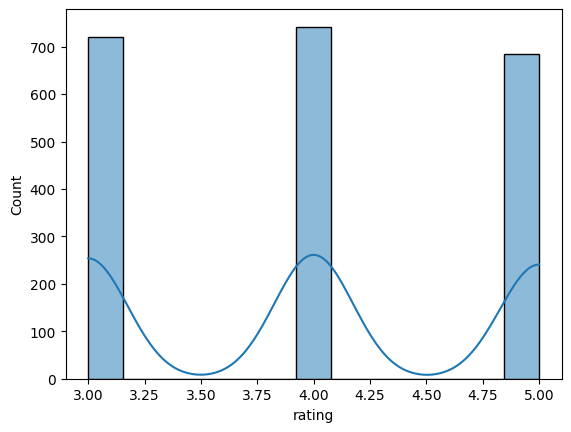

In [15]:
import seaborn as sns

sns.histplot(data=df_ratings, x="rating", kde=True)

<Axes: xlabel='rating', ylabel='Count'>

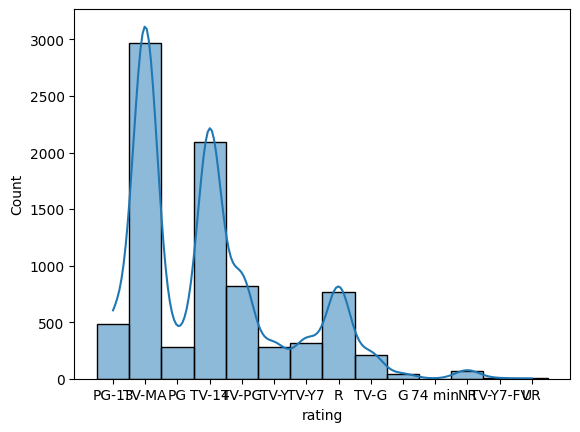

In [16]:
sns.histplot(data=df_titles, x="rating", kde=True)

<Axes: xlabel='duration', ylabel='Count'>

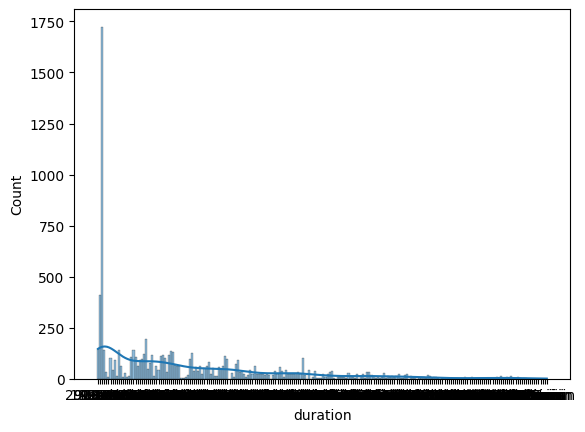

In [17]:
sns.histplot(data=df_titles, x="duration", kde=True, )

## Training//Trying Different Models & Approaches

### Creation of collaborative & content based models

In [18]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_ratings[['user_id', 'show_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8445


0.844493044838539

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_titles['combined_features'] = (
    df_titles['description'] + ' ' +
    df_titles['director'] + ' ' +
    df_titles['cast']
)
tfidf = TfidfVectorizer(stop_words='english')
df_titles = df_titles.reset_index(drop=True)
tfidf_matrix = tfidf.fit_transform(df_titles['combined_features'])

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01345389,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.00697425],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.0411861 ,
        0.        ],
       [0.01345389, 0.        , 0.        , ..., 0.0411861 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00697425, ..., 0.        , 0.        ,
        1.        ]])

### Function to get recommendations based off selected movie (mostly just making sure it works here)

In [20]:
def get_similar_titles(title, df_titles, cosine_sim, n=10):
    # Check if the title exists
    if title not in df_titles['title'].values:
        print(f"❌ Title '{title}' not found in DataFrame.")
        return pd.DataFrame()
    
    # Get index of the movie
    idx = df_titles[df_titles['title'] == title].index[0]
    
    # Get similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on similarity score (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Skip the first one (it's the same movie)
    sim_scores = sim_scores[1:n+1]
    
    # Get the indices of the recommended titles
    movie_indices = [i for i, _ in sim_scores]
    
    return df_titles.iloc[movie_indices][['show_id', 'title', 'description']]

In [188]:
recs = get_similar_titles('Dick Johnson Is Dead', df_titles, cosine_sim)
recs.to_csv(f"hybrid_recs_DickJohnson.csv", index=False)
recs.to_json(f"hybrid_recs_DickJohnson.json", index=False)

### Making CSV file with recommendations for all movies + saving cosine model to .sav file

In [21]:
# Define a function to build the full recommendation matrix
def build_all_recommendations(df, model, top_n=5):
    recommendations = []

    for idx, row in df.iterrows():
        title = row['title']
        recs_df = get_similar_titles(title, df, model, n=top_n)
        rec_titles = recs_df['title'].tolist()
        rec_row = {'movie_title': title}
        for i in range(top_n):
            rec_row[f'rec_{i+1}'] = rec_titles[i] if i < len(rec_titles) else ''
        recommendations.append(rec_row)

    return pd.DataFrame(recommendations)


In [205]:
# Build the full recommendation DataFrame
all_recs_df = build_all_recommendations(df_titles, cosine_sim, top_n=5)

# Export to JSON
all_recs_df.to_json("movie_recommendations.json", orient='records', indent=2)

## Working to Improve Model Fit
* Removing columns & running the model a few times to get a better fix in Azure

In [23]:
df_titles['mpaa_rating'] = df_titles['rating']
df_titles.drop(columns=['rating'], inplace=True)
df_titles.head()

,show_id,type,title,director,cast,release_year,duration,description,Action,Adventure,...,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers,combined_features,mpaa_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",2020,90 min,As her father nears the end of his life filmma...,0,0,...,0,0,0,0,0,0,0,0,As her father nears the end of his life filmma...,PG-13
1,s2,TV Show,Blood & Water,Multiple Directors,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,2021,2 Seasons,After crossing paths at a party a Cape Town te...,0,0,...,0,0,0,0,0,1,0,0,After crossing paths at a party a Cape Town te...,TV-MA
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,2021,1 Season,To protect his family from a powerful drug lor...,1,1,...,0,0,0,1,0,0,0,0,To protect his family from a powerful drug lor...,TV-MA
3,s5,TV Show,Kota Factory,Multiple Directors,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,2021,2 Seasons,In a city of coaching centers known to train I...,0,0,...,0,0,0,0,1,0,0,0,In a city of coaching centers known to train I...,TV-MA
4,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel Zach Gilford Hamish Linklater Henr...,2021,1 Season,The arrival of a charismatic young priest brin...,0,0,...,0,0,0,0,0,1,0,0,The arrival of a charismatic young priest brin...,TV-MA


In [74]:
df_master = pd.merge(df_ratings, df_users, on="user_id", how="inner")
df_master = pd.merge(df_master, df_titles, on="show_id", how="inner")
df_master.shape

(2116, 57)

In [75]:
df_master.drop(columns=['description', 'cast', 'title', 'type', 'city', 'mpaa_rating', 'director', 'combined_features', 'show_id', 'duration', 'Adventure', 'Family Movies'], inplace=True)
df_master['rating']

0       4
1       5
2       4
3       3
4       5
       ..
2111    3
2112    3
2113    3
2114    5
2115    3
Name: rating, Length: 2116, dtype: int64

In [ ]:
X = pd.get_dummies(df_master.drop(columns=['rating']))
y = df_master['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

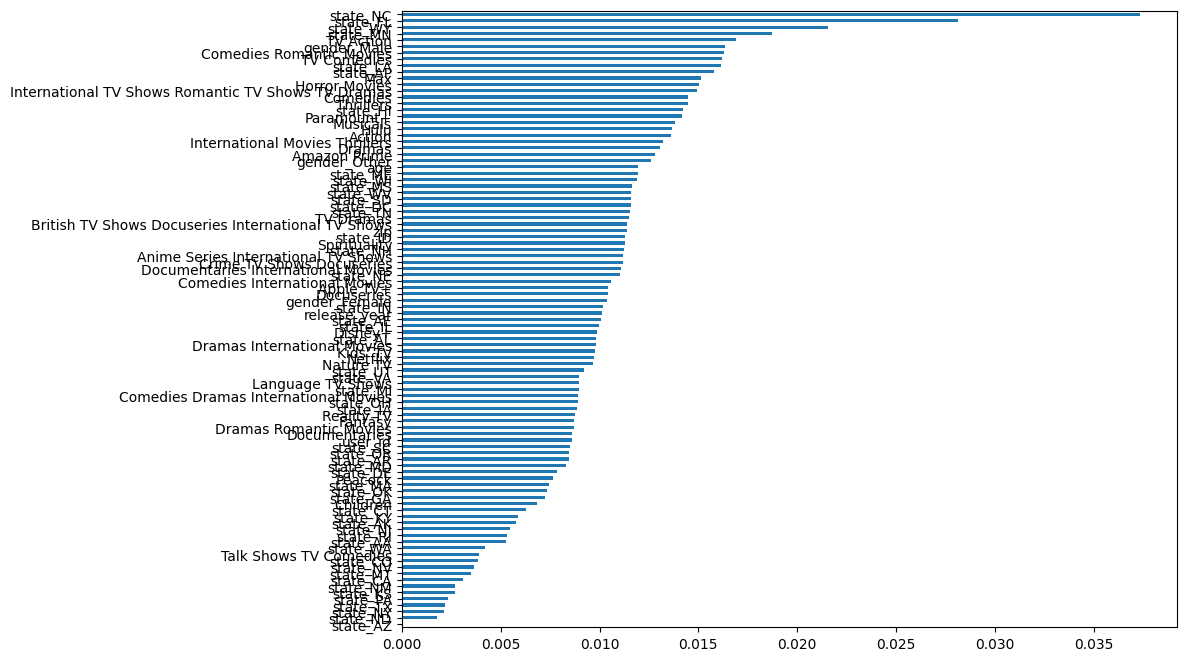

In [77]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))

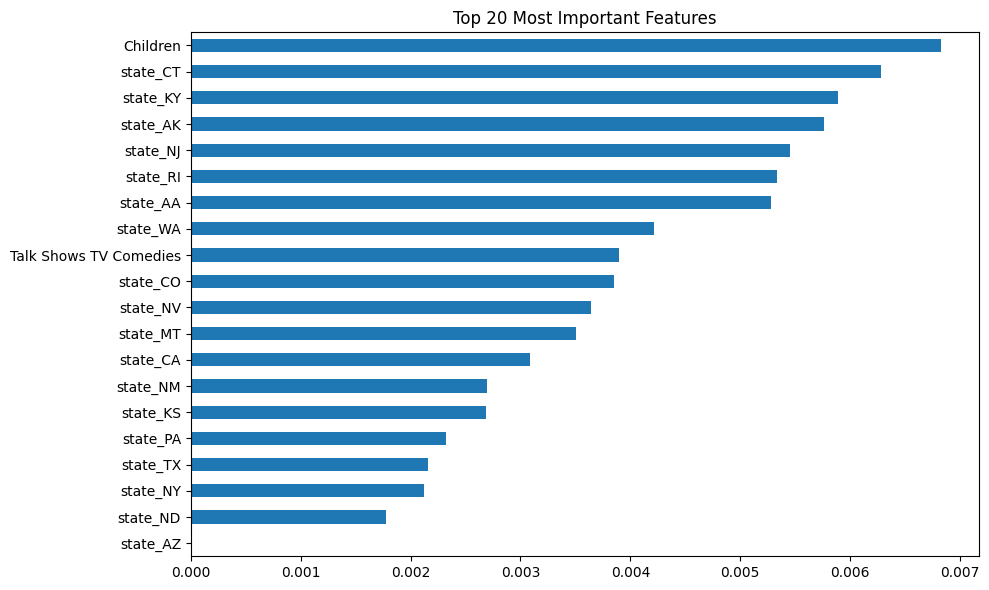

In [80]:
# Assuming you already have your model trained and feature importances extracted
import pandas as pd
import matplotlib.pyplot as plt

# Create the importances Series (works for either RF or XGB)
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and keep only the top 20 most important features
top_n = 20
top_features = importances.sort_values(ascending=False).tail(top_n)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()